In [32]:
import numpy as np
import pandas as pd
import seaborn as sns    #plot the graph of the data set
import matplotlib.pyplot as plt   # for the graph plotting (shows the relationship between the datas)
import os
import re
from sklearn.preprocessing import StandardScaler     #for reading and writing
from sklearn.model_selection import train_test_split # split the data set in to the train and the test data
import warnings
#warnings.filterwarning('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#importing the Necessary dependencies 
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics  # transforming the data in to the metrics

In [33]:
#reading the CVS file using pandas as pd
data = pd.read_csv('C:\\Users\\C Gangadhara\\OneDrive\\Documents\\Desktop\\Amrita college\\Mathematics 2\\Automobile_MPG_Prediction\\auto-mpg.csv')

In [34]:
data.head(400)  # head is used to print number of rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


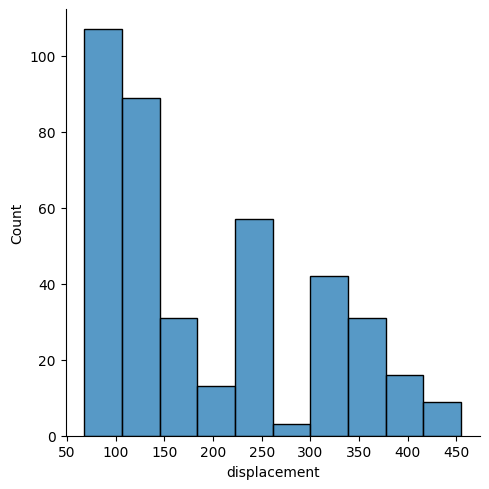

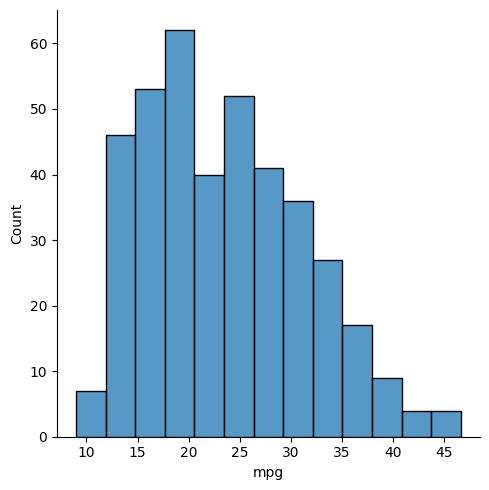

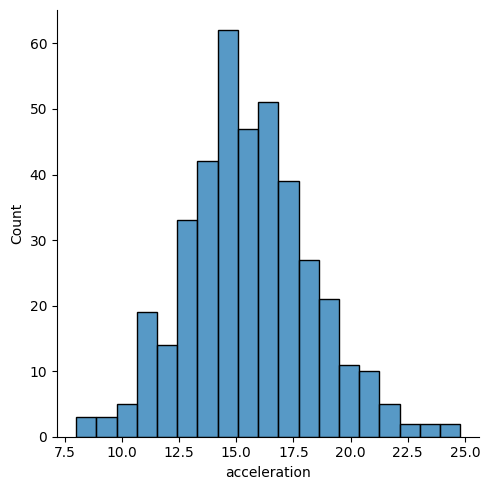

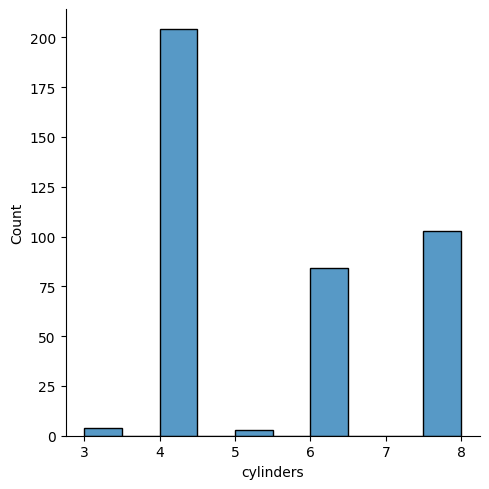

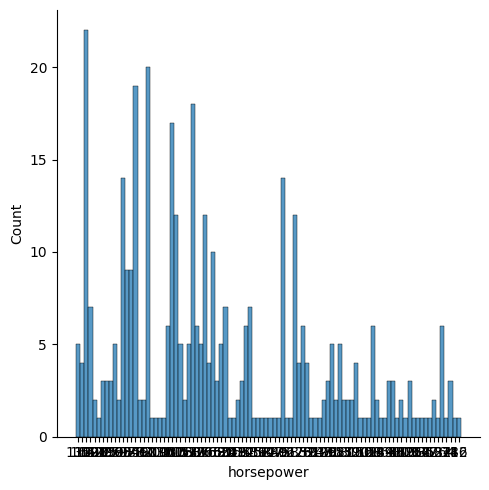

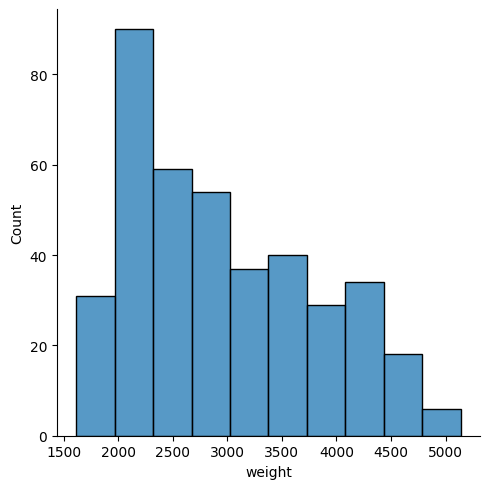

In [35]:
sns.displot(data['displacement'])
sns.displot(data['mpg'])
sns.displot(data['acceleration'])
sns.displot(data['cylinders'])
sns.displot(data['horsepower'])
sns.displot(data['weight'])     #ploting the graph of the given data

In [36]:
data.shape  #It prints the dimensions of the dataset

(398, 9)

In [37]:
data.columns   #It prints the names of the columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [38]:
data['car name'].value_counts() # list of car names repreted

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: car name, Length: 305, dtype: int64

In [39]:
data['car name'].unique()  #list of all car names

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [40]:
data.info()  #It shows the different datatype used in Automobile MPG prediction 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**Graph(Histrogram/Bar graph)**
    Data Visualisation

In [41]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(data, nGraphShown, nGraphPerRow):
    nunique = data.nunique()
    df = data[[col for col in data if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = data.shape
    columnNames = list(data)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = data.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [42]:
# Correlation matrix
def plotCorrelationMatrix(data, graphWidth):
    filename = data.dataframeName
    df = data.dropna('columns') # drop columns with NaN
    df = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({data.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [43]:
# Scatter and density plots
def plotScatterMatrix(data, plotSize, textSize):
    df = data.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = data.dropna('columns')
    df = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [44]:
data.dataframeName = 'auto-mpg.csv'
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 398 rows and 9 columns


In [45]:
plotPerColumnDistribution(data, 5, 1)

ValueError: Number of rows must be a positive integer, not 9.0

<Figure size 480x5760 with 0 Axes>

In [ ]:
plotCorrelationMatrix(data, 10)
#A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.
#A correlation matrix consists of rows and columns that show the variables. Each cell in a table contains the correlation coefficient.

In [ ]:
sns.pairplot(data, diag_kind = "kde", markers = '+') # we are ploting the dependent and independent and comparing it
plt.show()


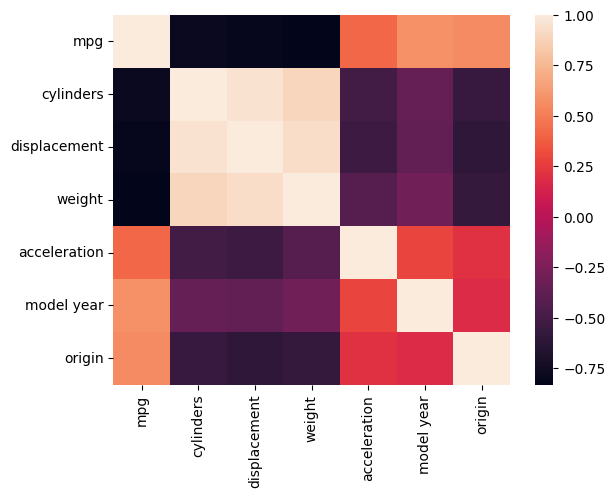

In [46]:
corr = data.corr()
sns.heatmap(corr)
plt.show()

#  Preprocessing

In [ ]:
data

In [ ]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
def encode(data): 
  label_encode = LabelEncoder()
  #label_genre = label_encode.fit_transform()
  label = label_encode.fit_transform(data)
  return label


In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Fill in missing horsepower values with the column mean
    df['horsepower'] = df['horsepower'].replace('?', np.NaN).astype(np.float)
    df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
    
    # Create make feature
    df['make'] = df['car name'].apply(lambda x: re.search(r'^\w+', x).group(0))
    df = df.drop('car name', axis=1)
    
    # Fix typos in make names
    make_typo_correction = {
        'vw': 'volkswagen',
        'chevy': 'chevrolet',
        'maxda': 'mazda',
        'vokswagen': 'volkswagen',
        'toyouta': 'toyota',
        'chevroelt': 'chevrolet'
    }
    df['make'] = df['make'].replace(make_typo_correction)
    
    # One-hot encode nominal features
    nominal_feature_dict = {
        'origin': 'orig',
        'make': 'mk'
    }
    df = onehot_encode(df, nominal_feature_dict)
    
    # Split df into X and y
    y = df['mpg'].copy()
    X = df.drop('mpg', axis=1).copy()
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    # Scale X_train and X_test with a standard scaler fit only on X_train
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
X_train

# **Training**

# Linear Regression:

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

In [ ]:
Reg_predict =reg.predict(X_test)
Reg_predict

**check Mean Squared Error for Linear Regression**

In [ ]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, Reg_predict)

In [ ]:
np.sqrt(mean_squared_error(y_test, Reg_predict))

# Decision tree model

In [ ]:
# Using a decision tree model
tree_model = DecisionTreeRegressor()
Dec=tree_model.fit(X_train, y_train)
A=Dec.score(X_train, y_train)
print(A)
dec_predict =tree_model.predict(X_test.values)
print(dec_predict)
tree_r2 = tree_model.score(X_test, y_test)
print("Decision Tree R^2: {:.5f}".format(tree_r2))

check mean square error using decision tree model

In [ ]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, dec_predict)


In [ ]:
np.sqrt(mean_squared_error(y_test,dec_predict))

# Random forest regression model

In [ ]:
# Using random forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

rf_r2 = rf_model.score(X_test, y_test)
print("Random Forest R^2: {:.5f}".format(rf_r2))

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
data = []  # initialize a array to store the trained data 
Random_Forest = RandomForestRegressor() #creating the instances of RandomForest Regressor
Random_Forest.fit(X_train.values,y_train.values)# it will train the model. Which can be used in predict() with a single arguement

In [ ]:
y_predict = Random_Forest.predict(X_test.values)
#y_predict = Random_Forest.predict(X_test)


In [ ]:
y_predict

Checking Mean Squared Error for Random Forest Regressor

In [ ]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, y_predict)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_predict))

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
n=5
poly = PolynomialFeatures(degree=n, include_bias=False)
#poly_features = poly.fit_transform(x_train.values.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

In [ ]:
poly_predict= reg.predict(X_test)
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, poly_predict)

In [ ]:
np.sqrt(mean_squared_error(y_test, poly_predict))

References:
https://www.analyticsvidhya.com/blog/2022/01/different-types-of-regression-models/

https://groverjatin.medium.com/predict-car-gas-mileage-machine-learning-regression-prediction-problem-675869517617
https://cocolevio.com/how-to-predict-car-fuel-efficiency-using-machine-learning/

# **Defining the linear regression**

In [47]:
#defining the model
#model1 = data[['cylinders ','weight','model year']]

# model4 = data[['origin']]
# model5 = data[['displacement']]
# model6 = data[['acceleration']]
# model7 = data[['cylinders','acceleration']]
# model8 = data[['cylinders','displacement']]
# model9 = data[['displacement','origin','cylinders']]
# model10 = data[['acceleration','origin','weight']]
# model11= data[['acceleration','origin','cylinders','displacement']]
#The output that the user get input from our dataset
actual_mpg = data['mpg']

In [48]:
#importing libraries for the model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression

# Prediction using cylinders

In [ ]:
from sklearn.metrics import mean_squared_error
x_train,x_test,y_train,y_test = train_test_split(data[['cylinders']],actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy of cylinders: "+str(r2_score*100))

The predicted values by this model is:
[14.36682056 28.72876025 28.72876025 14.36682056 28.72876025 28.72876025
 14.36682056 28.72876025 28.72876025 14.36682056 14.36682056 28.72876025
 14.36682056 14.36682056 21.5477904  28.72876025 14.36682056 28.72876025
 21.5477904  14.36682056]
MSE: 3.6110525384736762
Accuracy of cylinders: 73.25030527843259


# Prediction using weight

In [49]:
x_train,x_test,y_train,y_test = train_test_split(data[['weight']],actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy of weight: "+str(r2_score*100))

The predicted values by this model is:
[17.31928996 29.51368717 25.16238244 12.36939304 28.92276925 28.65417019
 14.53353402 29.30648219 27.39559175 17.64160883 11.77847512 28.27045725
 12.65334062 18.90786153 23.1210296  26.77397679 13.47448631 26.0832935
 21.14874509 19.41436261]
MSE: 2.8942053343558762
Accuracy of weight: 82.81656853963824


# Prediction using Model year

In [50]:
x_train,x_test,y_train,y_test = train_test_split(data[['model year']],actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy of model year: "+str(r2_score*100))

The predicted values by this model is:
[19.96212289 28.39710788 24.78211432 18.75712503 24.78211432 21.16712075
 24.78211432 29.60210574 23.57711646 25.98711217 19.96212289 29.60210574
 18.75712503 25.98711217 19.96212289 22.3721186  19.96212289 29.60210574
 19.96212289 16.34712932]
MSE: 4.84794096275529
Accuracy of model year: 51.78681074697635


# Prediction using origin

The predicted values by this model is:
[20.42847839 25.9181367  20.42847839 20.42847839 31.40779501 25.9181367
 20.42847839 20.42847839 25.9181367  20.42847839 20.42847839 31.40779501
 20.42847839 20.42847839 20.42847839 31.40779501 20.42847839 20.42847839
 20.42847839 20.42847839]
MSE: 5.918690520405277
Accuracy of origin: 28.13747386750127


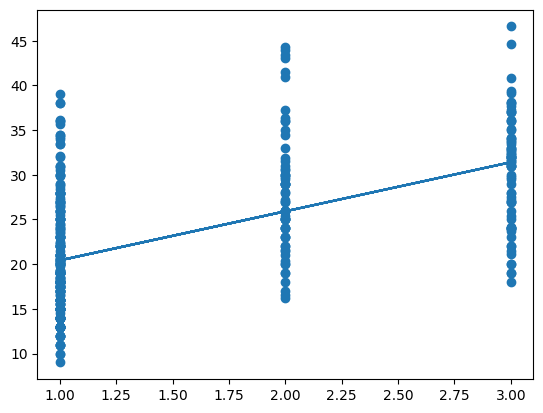

In [51]:

x_train,x_test,y_train,y_test = train_test_split(data[['origin']],actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
plt.scatter(x_train,y_train)
plt.plot(x_test,Reg_predict)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy of origin: "+str(r2_score*100))

# Prediction using displacement

The predicted values by this model is:
[15.91944468 29.34283497 26.73104409 10.93882023 29.34283497 29.34283497
 15.91944468 28.85692038 28.73544174 15.91944468 13.97578636 28.67470242
 10.93882023 16.89127384 20.04971861 28.00656987 10.93882023 26.06291155
 20.04971861 16.58757723]
MSE: 3.1871438312563525
Accuracy of displacement: 79.16207158761152


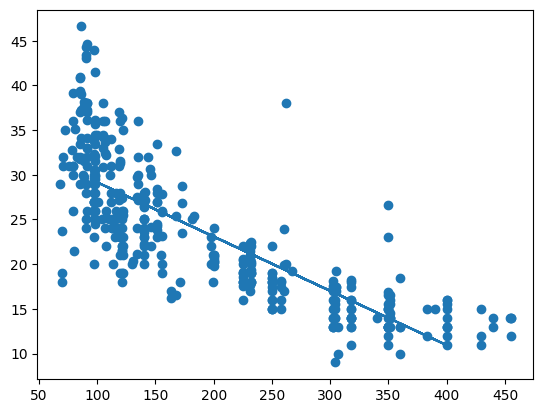

In [52]:

x_train,x_test,y_train,y_test = train_test_split(data[['displacement']],actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
plt.scatter(x_train,y_train)
plt.plot(x_test,Reg_predict)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy of displacement: "+str(r2_score*100))

# Prediction using Acceleration

The predicted values by this model is:
[19.95864629 23.81423022 23.81423022 19.95864629 26.61829125 22.29536382
 21.36067681 22.76270733 23.46372259 20.77649743 19.95864629 24.98258898
 19.37446691 20.30915392 24.63208135 25.21626074 16.45357    24.51524548
 26.3846195  19.37446691]
MSE: 5.942347293702054
Accuracy of acceleration: 27.561862430856156


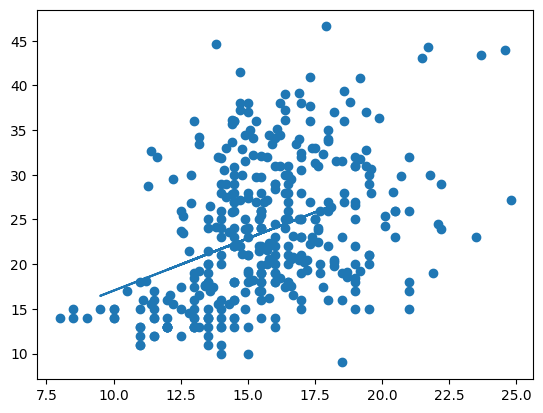

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(data[['acceleration']],actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
plt.scatter(x_train,y_train)
plt.plot(x_test,Reg_predict)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy of acceleration: "+str(r2_score*100))

In [53]:

x_train,x_test,y_train,y_test = train_test_split(data[['acceleration','displacement']],actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)

print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

The predicted values by this model is:
[15.97809981 29.39430126 26.75553082 10.94602595 29.28822761 29.45175782
 15.92506298 28.94314484 28.79389292 15.94716166 14.01436367 28.67506961
 10.96812462 16.94670867 19.97424969 27.99119584 11.07861801 26.05397811
 19.90795366 16.67523278]
MSE: 3.150402470559167
Accuracy: 79.63974118151582


In [54]:

x_train,x_test,y_train,y_test = train_test_split(data[['acceleration','model year']],actual_mpg,test_size = 0.05,random_state =500)
reg = LinearRegression().fit(x_train, y_train)
r2_score_train = reg.score(x_train, y_train)
Reg_predict =reg.predict(x_test)
print("The predicted values by this model is:")
print(Reg_predict)
MSE = np.sqrt(mean_squared_error(y_test, Reg_predict))
print("MSE: "+str(MSE))
r2_score = reg.score(x_test,y_test)
print("Accuracy: "+str(r2_score*100))

The predicted values by this model is:
[18.03378616 27.8877888  24.76004804 16.99120591 26.61891414 20.62542149
 23.13354021 28.23329426 23.48510953 23.7888567  18.03378616 29.70489659
 16.60394214 23.47904568 21.13189632 23.60432059 15.71020355 29.39508557
 22.29368763 14.51878164]
MSE: 4.281333040639532
Accuracy: 62.39814757211868
